In [1]:
# Import 需要的套件
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'
f = os.path.join(dir_data, 'BRAZIL_CITIES.csv')

# 讀取檔案
data = pd.read_csv(f)
data.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,São Paulo,SP,1,11253503.0,11133776.0,119727.0,3576148.0,3548433.0,27715.0,10463636.0,...,8.0,1.947077e+13,2.893261e+12,5740995.0,1134570.0,3236.0,1.0,130.0,7.0,225.0
1,Osasco,SP,0,666740.0,664447.0,2293.0,202009.0,202009.0,NaN,616068.0,...,2.0,6.732330e+12,1.321699e+10,283641.0,73477.0,174.0,NaN,7.0,1.0,10.0
2,Rio De Janeiro,RJ,1,6320446.0,6264915.0,55531.0,2147235.0,2147235.0,NaN,5426838.0,...,5.0,2.283445e+12,9.738864e+11,2039930.0,363486.0,289.0,1.0,68.0,1.0,120.0
3,Brasília,DF,1,2570160.0,2564370.0,5790.0,774820.0,751558.0,23261.0,2450634.0,...,4.0,2.920933e+11,8.016164e+12,1288107.0,211392.0,594.0,1.0,28.0,1.0,60.0
4,Porto Alegre,RS,1,1409351.0,1403450.0,5901.0,508503.0,508503.0,NaN,1339712.0,...,3.0,2.709619e+11,4.026997e+11,608777.0,106829.0,1383.0,1.0,19.0,12.0,53.0


## 展示本次欲處理資料的相關信息

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 81 columns):
CITY                      5576 non-null object
STATE                     5576 non-null object
CAPITAL                   5576 non-null int64
IBGE_RES_POP              5568 non-null float64
IBGE_RES_POP_BRAS         5568 non-null float64
IBGE_RES_POP_ESTR         5568 non-null float64
IBGE_DU                   5566 non-null float64
IBGE_DU_URBAN             5566 non-null float64
IBGE_DU_RURAL             5495 non-null float64
IBGE_POP                  5568 non-null float64
IBGE_1                    5568 non-null float64
IBGE_1-4                  5568 non-null float64
IBGE_5-9                  5568 non-null float64
IBGE_10-14                5568 non-null float64
IBGE_15-59                5568 non-null float64
IBGE_60+                  5568 non-null float64
IBGE_PLANTED_AREA         5573 non-null float64
IBGE_CROP_PRODUCTION_$    5573 non-null float64
IDHM Ranking 2010         5568 no

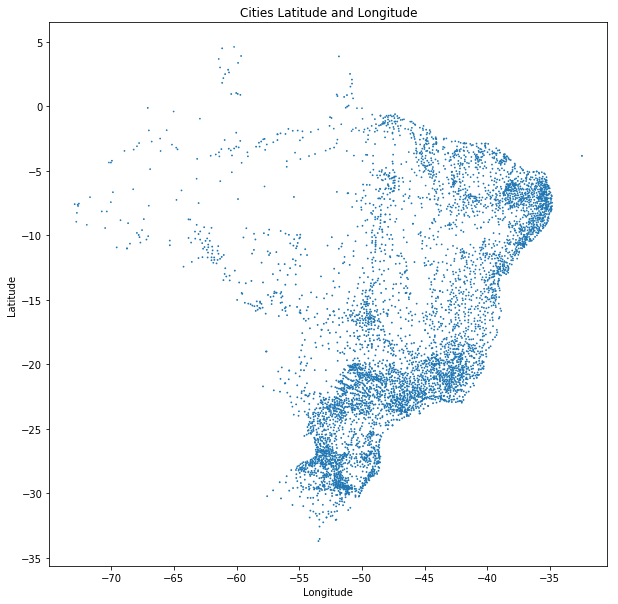

In [4]:
# 秀出 city 的分布位置
# remove zero values
mask1= data["LONG"] != 0
mask2 = data["LAT"] !=0 

x = data[mask1&mask2]["LONG"]
y = data[mask1&mask2]["LAT"]
z1 = data[mask1&mask2]["IDHM"]
 
# use the scatter function
plt.figure(figsize=(10,10))
plt.title("Cities Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(x, y, s=z1, alpha=1)
plt.show()

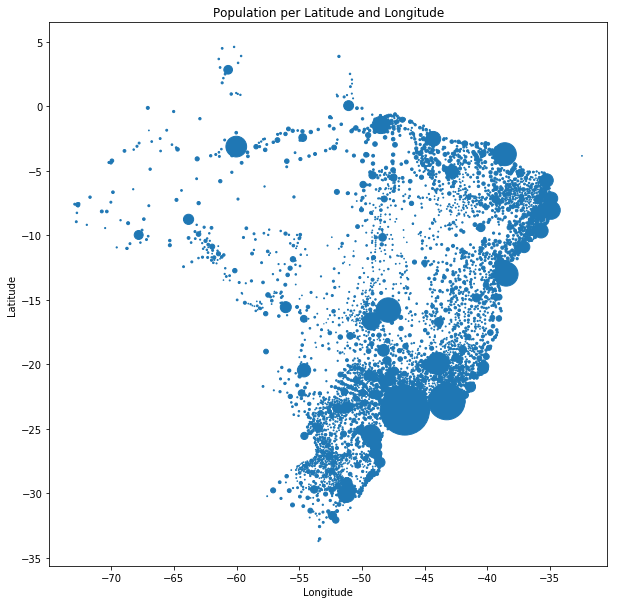

In [5]:
# 秀出人口的分布位置
# remove zero values
z2 = data[mask1&mask2]["ESTIMATED_POP"]
 
# use the scatter function
plt.figure(figsize=(10,10))
plt.title("Population per Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(x, y, s=z2/5000, alpha=1)
plt.show()

# 前處理

In [6]:
#只取類別值 (object) 型欄位, 存於 object_features 中
object_features = []
for dtype, feature in zip(data.dtypes, data.columns):
    if dtype == 'object':
        object_features.append(feature)
print(f'{len(object_features)} object Features : {object_features}\n')

6 object Features : ['CITY', 'STATE', 'REGIAO_TUR', 'CATEGORIA_TUR', 'RURAL_URBAN', 'GVA_MAIN']



In [7]:
#只取數值 (Numeric) 型欄位, 存於 Numeric_features 中
num_features = []
for dtype, feature in zip(data.dtypes, data.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} numeric Features : {num_features}\n')


75 numeric Features : ['CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS', 'IBGE_RES_POP_ESTR', 'IBGE_DU', 'IBGE_DU_URBAN', 'IBGE_DU_RURAL', 'IBGE_POP', 'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14', 'IBGE_15-59', 'IBGE_60+', 'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$', 'IDHM Ranking 2010', 'IDHM', 'IDHM_Renda', 'IDHM_Longevidade', 'IDHM_Educacao', 'LONG', 'LAT', 'ALT', 'PAY_TV', 'FIXED_PHONES', 'AREA', 'ESTIMATED_POP', 'GVA_AGROPEC', 'GVA_INDUSTRY', 'GVA_SERVICES', 'GVA_PUBLIC', ' GVA_TOTAL ', 'TAXES', 'GDP', 'POP_GDP', 'GDP_CAPITA', 'MUN_EXPENDIT', 'COMP_TOT', 'COMP_A', 'COMP_B', 'COMP_C', 'COMP_D', 'COMP_E', 'COMP_F', 'COMP_G', 'COMP_H', 'COMP_I', 'COMP_J', 'COMP_K', 'COMP_L', 'COMP_M', 'COMP_N', 'COMP_O', 'COMP_P', 'COMP_Q', 'COMP_R', 'COMP_S', 'COMP_T', 'COMP_U', 'HOTELS', 'BEDS', 'Pr_Agencies', 'Pu_Agencies', 'Pr_Bank', 'Pu_Bank', 'Pr_Assets', 'Pu_Assets', 'Cars', 'Motorcycles', 'Wheeled_tractor', 'UBER', 'MAC', 'WAL-MART', 'POST_OFFICES']



In [8]:
# 把數值型 feature 中的 NA 用平均值取代掉
for i in num_features:
    q_50 = np.percentile(data[~data[i].isnull()][i], 50)
    data.loc[data[i].isnull(),i] = q_50

In [9]:
# 把 object 型 feature 中的 NA 用 'none' 取代掉
for i in object_features:
    data.loc[data[i].isnull(),i] = 'none'

In [10]:
data.set_index('CITY', inplace=True)

In [11]:
data = data.drop("REGIAO_TUR", axis = 1)

### 分界標準：

極高：0.800以上

高：0.799~0.700之間

中：0.699~0.550之間

低：0.549以下

In [12]:
# 把 IDHM 轉為4種 level
data.loc[data['IDHM'] >= 0.8,'IDHM'] = 3
data.loc[data['IDHM'] <= 0.799,'IDHM'] = 2
data.loc[data['IDHM'] <= 0.699,'IDHM'] = 1
data.loc[data['IDHM'] <= 0.549,'IDHM'] = 0

In [13]:
# 對 object 物件做 one hot
data = pd.get_dummies(data)

# model

In [14]:
feature = list(data.columns)
x_train, x_test, y_train, y_test = train_test_split(data[feature], data['IDHM'], test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [15]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.00


In [16]:
r2 = r2_score(y_test, y_pred)
print("R2: ", r2)

R2:  0.9999592389837672


In [17]:
# 建立一個羅吉斯回歸模型
regr = LogisticRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

C:\Users\haikhun\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haikhun\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [18]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.989247311827957
